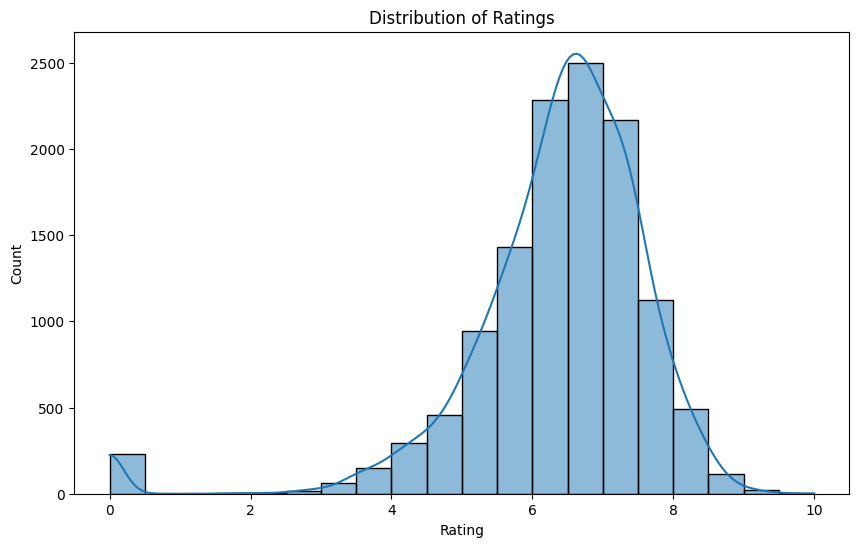

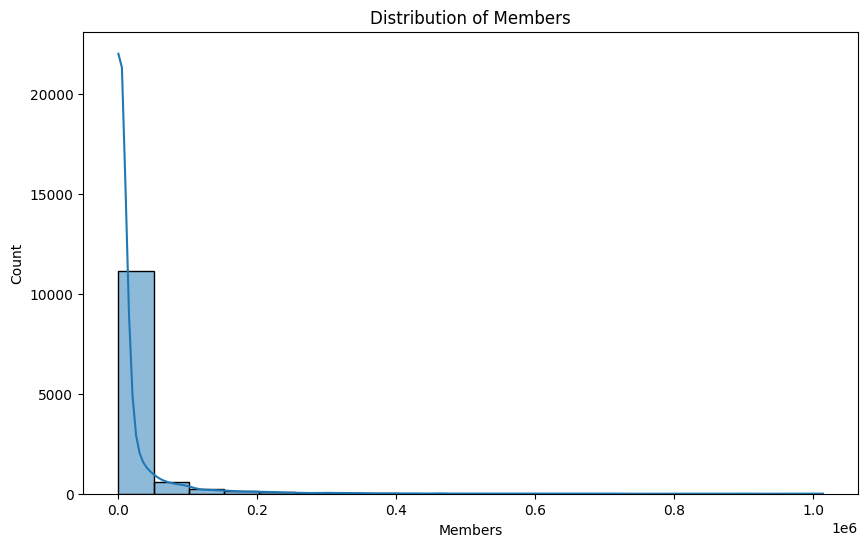

Top 10 recommended anime using Cosine Similarity for anime with ID 1
Cowboy Bebop (Similarity Score: 0.9999999999999999)
Yahari Ore no Seishun Love Comedy wa Machigatteiru. (Similarity Score: 0.9999999995889136)
Mahouka Koukou no Rettousei (Similarity Score: 0.9999999961134917)
Lucky☆Star (Similarity Score: 0.9999999378893729)
Claymore (Similarity Score: 0.9999997530236121)
Gakusen Toshi Asterisk (Similarity Score: 0.999999030645567)
Baka to Test to Shoukanjuu (Similarity Score: 0.9999982882729079)
Free! (Similarity Score: 0.9999977828431824)
Higurashi no Naku Koro ni (Similarity Score: 0.9999973428058347)
Gokukoku no Brynhildr (Similarity Score: 0.9999967407930418)

Top 10 recommended anime using Euclidean Distance for anime with ID 1
Cowboy Bebop (Similarity Score: 1.0)
Bakemonogatari (Similarity Score: 0.6692252450996343)
One Piece (Similarity Score: 0.625559121125601)
Sen to Chihiro no Kamikakushi (Similarity Score: 0.6159270645989345)
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import StandardScaler

# Load dataset
anime_data = pd.read_csv(r'c:\Users\HP PROBOOK\Downloads\Recommendation System\Recommendation System\anime.csv')  

# Handle missing values
anime_data.fillna(0, inplace=True)

# Exploratory Data Analysis (EDA) and Visualization
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['members'], bins=20, kde=True)
plt.title('Distribution of Members')
plt.xlabel('Members')
plt.ylabel('Count')
plt.show()

# Feature extraction
features = ['rating', 'members']
scaler = StandardScaler()
anime_data[features] = scaler.fit_transform(anime_data[features])

# Recommendation system with different similarity measures
def recommend_anime(target_anime_id, dataset, features, threshold=0.5, top_n=10, similarity_measure='cosine'):
    target_anime = dataset[dataset['anime_id'] == target_anime_id]
    target_features = target_anime[features].values.reshape(1, -1)
    
    if similarity_measure == 'cosine':
        similarities = cosine_similarity(dataset[features], target_features)
    elif similarity_measure == 'euclidean':
        similarities = 1 - euclidean_distances(dataset[features], target_features)
    # Add more similarity measures as needed
    
    similar_indices = np.where(similarities > threshold)[0]
    similar_anime = sorted(zip(similar_indices, similarities[similar_indices]), key=lambda x: -x[1])
    
    return similar_anime[:top_n]

# Example usage with different similarity measures
target_anime_id = 1  # Change to the ID of the anime you want recommendations for
recommendations_cosine = recommend_anime(target_anime_id, anime_data, features, similarity_measure='cosine')
recommendations_euclidean = recommend_anime(target_anime_id, anime_data, features, similarity_measure='euclidean')

print("Top 10 recommended anime using Cosine Similarity for anime with ID", target_anime_id)
for idx, sim in recommendations_cosine:
    anime_title = anime_data.iloc[idx]['name']
    similarity_score = sim[0]
    print(f"{anime_title} (Similarity Score: {similarity_score})")

print("\nTop 10 recommended anime using Euclidean Distance for anime with ID", target_anime_id)
for idx, sim in recommendations_euclidean:
    anime_title = anime_data.iloc[idx]['name']
    similarity_score = sim[0]
    print(f"{anime_title} (Similarity Score: {similarity_score})")
